# Examining the effect of the US war on drugs on Mexico's homicide rate

#### My hypothesis is that violence begets more violence. Hence, fighting the Cartels lead to more homicides.

##### I was interested in the city of Guadalajara as I wanted to investigate how the break up of the Guadalajara cartel led to more homicides. As this cartel broke into plazas, there were many in-fightings over turf. The Guadalajara cartel was the overarching and pre-eminent cartel in Mexico in the 1980s. As Mexico had a single cartel system, violence was controlled and there was no need to fight over turfs.

##### However, the cartel broke up in 1989, which led to more violence and homicides in Mexico.
#### Data source- https://justiceinmexico.org/data/, https://elcri.men/en/, https://www.inegi.org.mx/temas/incidencia/, https://www.economia.gob.mx/datamexico

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing packages and library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
plt.figure(figsize=(14, 7))
sns.set(rc={'figure.figsize':(14, 7)})

# Loading data
my_data = "/content/gdrive/My Drive/Colab Notebooks/mex_hom.csv"
df = pd.read_csv(my_data)
df.head()

State Code  Municipality Code           State    Municipality  \
0         1.0                1.0  Aguascalientes  Aguascalientes   
1         1.0                2.0  Aguascalientes        Asientos   
2         1.0                3.0  Aguascalientes        Calvillo   
3         1.0                4.0  Aguascalientes           Cosío   
4         1.0                5.0  Aguascalientes     Jesús María   

  Municipality (no accent) INEGI CODE  1990  1991  1992  1993  ...  2007  \
0           Aguascalientes      01001  26.0  36.0  26.0  24.0  ...  31.0   
1                 Asientos      01002   0.0   1.0   4.0   2.0  ...   1.0   
2                 Calvillo      01003   2.0   1.0   2.0   0.0  ...   0.0   
3                    Cosio      01004   0.0   0.0   0.0   0.0  ...   1.0   
4              Jesus Maria      01005   2.0   1.0   1.0   1.0  ...   2.0   

   2008  2009  2010  2011  2012  2013  2014  2015  Unnamed: 32  
0  45.0  48.0  61.0  71.0  35.0  24.0  37.0  31.0          NaN  
1   3.0   0.0   1.0   1.0   2.0   5.0   0.0   1.0          NaN  
2   1.0   0.0   0.0   2.0   0.0   0.0   2.0   NaN          NaN  
3   0.0   0.0   2.0   1.0   1.0   0.0   0.0   1.0          NaN  
4   2.0   7.0   3.0   4.0   4.0   6.0   4.0   4.0          NaN  

[5 rows x 33 columns]

<Figure size 1400x700 with 0 Axes>

In [ ]:
df.columns

Index(['State Code', 'Municipality Code', 'State', 'Municipality',
       'Municipality (no accent)', 'INEGI CODE', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Dropping a column
del df['Unnamed: 32']


In [ ]:
df.head(10)

State Code  Municipality Code           State         Municipality  \
0         1.0                1.0  Aguascalientes       Aguascalientes   
1         1.0                2.0  Aguascalientes             Asientos   
2         1.0                3.0  Aguascalientes             Calvillo   
3         1.0                4.0  Aguascalientes                Cosío   
4         1.0                5.0  Aguascalientes          Jesús María   
5         1.0                6.0  Aguascalientes  Pabellón de Arteaga   
6         1.0                7.0  Aguascalientes      Rincón de Romos   
7         1.0                8.0  Aguascalientes   San José de Gracia   
8         1.0                9.0  Aguascalientes             Tepezalá   
9         1.0               10.0  Aguascalientes             El Llano   

  Municipality (no accent) INEGI CODE  1990  1991  1992  1993  ...  2006  \
0           Aguascalientes      01001  26.0  36.0  26.0  24.0  ...  23.0   
1                 Asientos      01002   0.0   1.0   4.0   2.0  ...   1.0   
2                 Calvillo      01003   2.0   1.0   2.0   0.0  ...   0.0   
3                    Cosio      01004   0.0   0.0   0.0   0.0  ...   0.0   
4              Jesus Maria      01005   2.0   1.0   1.0   1.0  ...   1.0   
5      Pabellon de Arteaga      01006   0.0   1.0   1.0   1.0  ...   0.0   
6          Rincon de Romos      01007   1.0   1.0   1.0   1.0  ...   0.0   
7       San Jose de Gracia      01008   0.0   1.0   0.0   0.0  ...   0.0   
8                 Tepezala      01009   0.0   2.0   0.0   0.0  ...   0.0   
9                 El Llano      01010   0.0   0.0   0.0   1.0  ...   1.0   

   2007  2008  2009  2010  2011  2012  2013  2014  2015  
0  31.0  45.0  48.0  61.0  71.0  35.0  24.0  37.0  31.0  
1   1.0   3.0   0.0   1.0   1.0   2.0   5.0   0.0   1.0  
2   0.0   1.0   0.0   0.0   2.0   0.0   0.0   2.0   NaN  
3   1.0   0.0   0.0   2.0   1.0   1.0   0.0   0.0   1.0  
4   2.0   2.0   7.0   3.0   4.0   4.0   6.0   4.0   4.0  
5   1.0   3.0   2.0   2.0   2.0   1.0   2.0   0.0   1.0  
6   6.0   4.0   3.0   4.0   4.0   1.0   2.0   1.0   NaN  
7   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   NaN  
8   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   NaN  
9   0.0   0.0   1.0   3.0   5.0   0.0   1.0   0.0   NaN  

[10 rows x 32 columns]

### As my data only has years from 1990, I can't pursue the Guadalajara cartel research


In [ ]:
# Specify the columns to use as identifiers (State and Municipality)
id_cols = ['State Code', 'Municipality Code', 'State', 'Municipality']

# Melt the DataFrame to create a 'Year' and 'Homicide' column
df1 = pd.melt(df, id_vars=id_cols, var_name='Year', value_name='Homicide')

# Sort the DataFrame by State, Municipality, and Year
df1 = df1.sort_values(by=['State', 'Municipality', 'Year']).reset_index(drop=True)


In [ ]:
df1.head()

State Code  Municipality Code           State    Municipality  Year  \
0         1.0                1.0  Aguascalientes  Aguascalientes  1990   
1         1.0                1.0  Aguascalientes  Aguascalientes  1991   
2         1.0                1.0  Aguascalientes  Aguascalientes  1992   
3         1.0                1.0  Aguascalientes  Aguascalientes  1993   
4         1.0                1.0  Aguascalientes  Aguascalientes  1994   

  Homicide  
0     26.0  
1     36.0  
2     26.0  
3     24.0  
4     17.0

In [ ]:
unique_states = df1['State'].unique()
print(unique_states)

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Chiapas' 'Chihuahua' 'Coahuila de Zaragoza' 'Colima' 'Distrito Federal'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco'
 'Michoacán de Ocampo' 'Morelos' 'México' 'Nayarit' 'Nuevo León' 'Oaxaca'
 'Puebla' 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora'
 'Tabasco' 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave'
 'Yucatán' 'Zacatecas' nan]


#### Mexico's Cumulative Homicide Rate

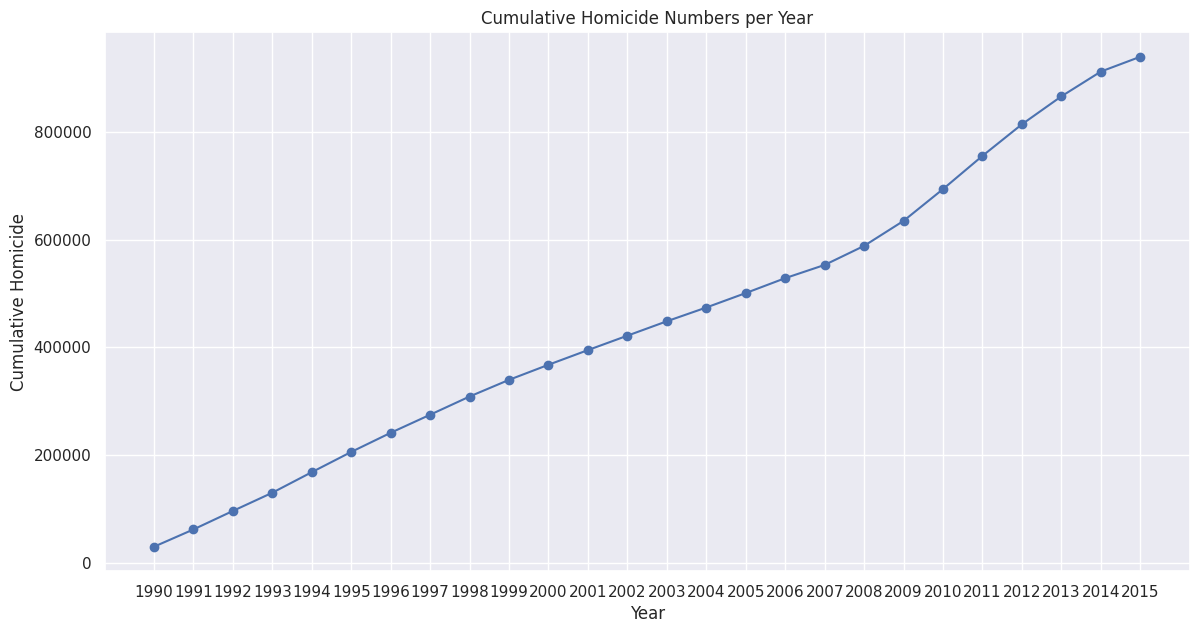

In [ ]:
# Convert the 'Homicide' column to a numeric data type, coercing non-numeric values to NaN
df1['Homicide'] = pd.to_numeric(df1['Homicide'], errors='coerce')

# Drop rows with NaN values (if necessary)
df1.dropna(subset=['Homicide'], inplace=True)

# Group the data by 'Year' and calculate the cumulative sum of homicides
cumulative_data = df1.groupby('Year')['Homicide'].sum().cumsum().reset_index()
cumulative_data = cumulative_data[~cumulative_data['Year'].isin(['INEGI CODE', 'Municipality (no accent)'])]

# Plot the cumulative numbers of homicide per year
#plt.figure(figsize=(20, 12))
plt.plot(cumulative_data['Year'], cumulative_data['Homicide'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Cumulative Homicide')
plt.title('Cumulative Homicide Numbers per Year')
plt.grid(True)
plt.show()


In [ ]:
cumulative_data.head(30)

Year  Homicide
0   1990   29758.0
1   1991   61859.0
2   1992   96189.0
3   1993  130020.0
4   1994  168144.0
5   1995  205729.0
6   1996  241243.0
7   1997  274784.0
8   1998  308580.0
9   1999  339533.0
10  2000  367553.0
11  2001  394756.0
12  2002  421532.0
13  2003  448259.0
14  2004  473805.0
15  2005  500606.0
16  2006  528284.0
17  2007  552829.0
18  2008  588181.0
19  2009  634602.0
20  2010  693598.0
21  2011  755263.0
22  2012  813871.0
23  2013  865732.0
24  2014  911680.0
25  2015  939199.0

#### Homicide numbers per state

In [ ]:
# Homicide per state per year

# Group the data by 'State' and 'Year' and calculate the cumulative sum of homicides
cumulative_state_data = df1.groupby(['State', 'Year'])['Homicide'].sum().groupby(level=0).cumsum().reset_index()

# Sort the DataFrame by 'State' and 'Year'
cumulative_state_data = cumulative_state_data.sort_values(by=['State', 'Year']).reset_index(drop=True)

cumulative_state_data = cumulative_state_data[cumulative_state_data['Year'] != 'INEGI CODE']


In [ ]:
cumulative_state_data.tail()

State  Year  Homicide
858  Zacatecas  2011    2550.0
859  Zacatecas  2012    3017.0
860  Zacatecas  2013    3405.0
861  Zacatecas  2014    3598.0
862  Zacatecas  2015    3758.0

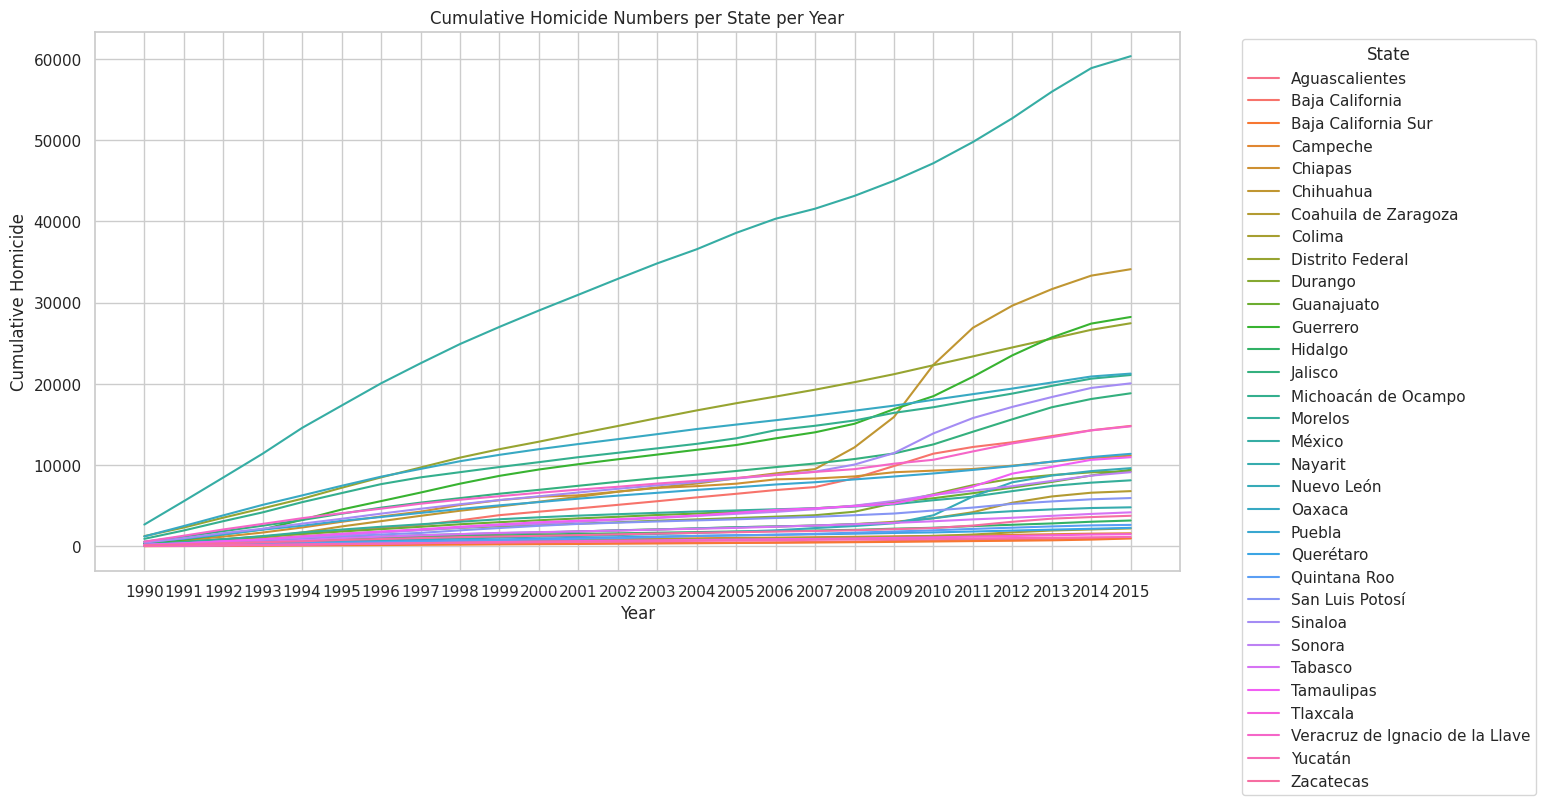

In [ ]:
# Plotting cumulative homicide rate per state per year

# Create a distinct color palette
distinct_colors = sns.color_palette("hsv", n_colors=len(cumulative_state_data['State'].unique()))

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', hue='State', data=cumulative_state_data)
plt.title('Cumulative Homicide Numbers per State per Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Homicide')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### A deep dive into Jalisco, the state where the Guadalajara cartel is based.

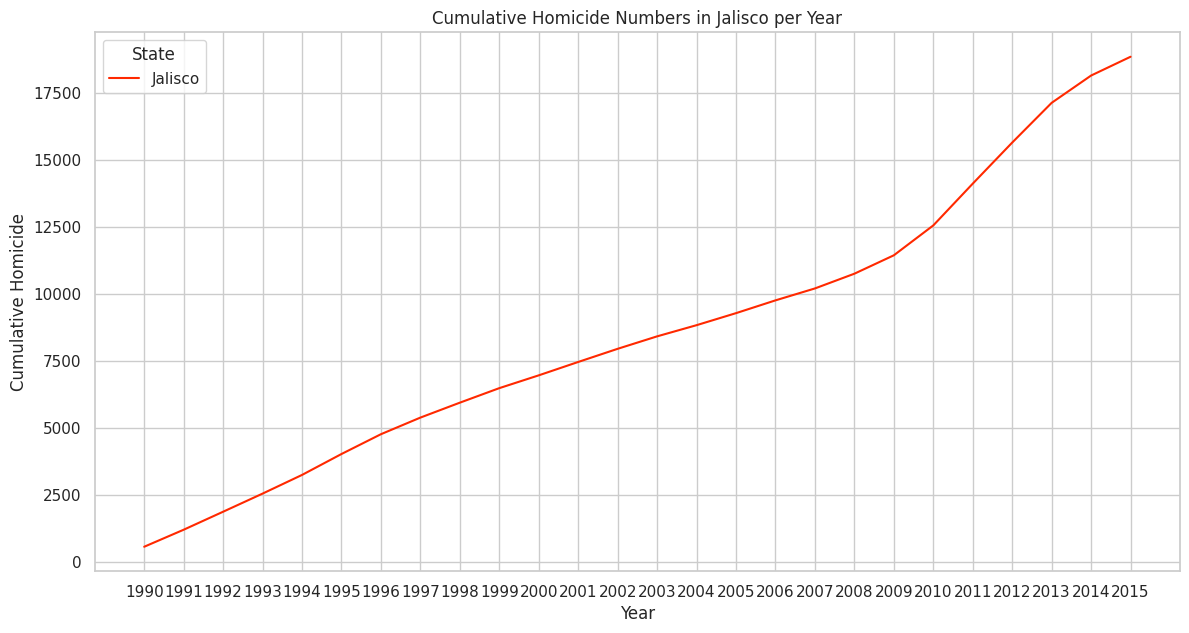

In [ ]:
# For the State of Jalisco, the base of Guadalajara Cartel

# Create a distinct color palette
distinct_colors = sns.color_palette("hsv", n_colors=len(cumulative_state_data['State'].unique()))

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Filter data for 'Jalisco'
jalisco_data = cumulative_state_data[cumulative_state_data['State'] == 'Jalisco']

# Create a line plot for Jalisco
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=jalisco_data, color=distinct_colors[0])  # Use the first color from the palette
plt.title('Cumulative Homicide Numbers in Jalisco per Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Homicide')
plt.legend(['Jalisco'], title='State', loc='upper left')

plt.show()


In [ ]:
jalisco_data

State  Year  Homicide
351  Jalisco  1990     555.0
352  Jalisco  1991    1190.0
353  Jalisco  1992    1862.0
354  Jalisco  1993    2538.0
355  Jalisco  1994    3235.0
356  Jalisco  1995    4016.0
357  Jalisco  1996    4755.0
358  Jalisco  1997    5375.0
359  Jalisco  1998    5932.0
360  Jalisco  1999    6474.0
361  Jalisco  2000    6952.0
362  Jalisco  2001    7451.0
363  Jalisco  2002    7942.0
364  Jalisco  2003    8407.0
365  Jalisco  2004    8824.0
366  Jalisco  2005    9273.0
367  Jalisco  2006    9750.0
368  Jalisco  2007   10195.0
369  Jalisco  2008   10745.0
370  Jalisco  2009   11432.0
371  Jalisco  2010   12547.0
372  Jalisco  2011   14106.0
373  Jalisco  2012   15639.0
374  Jalisco  2013   17122.0
375  Jalisco  2014   18141.0
376  Jalisco  2015   18842.0

#### State with the maximum homicide numbers

In [ ]:
# Find the state with the maximum cumulative homicides
state_with_max_homicides = cumulative_state_data.loc[cumulative_state_data['Homicide'].idxmax()]['State']
max_homicides = cumulative_state_data['Homicide'].max()

print(f"The state with the maximum cumulative homicides is {state_with_max_homicides} with a total of {max_homicides} homicides.")


The state with the maximum cumulative homicides is México with a total of 60354.0 homicides.


#### State with the second-highest homicide number as I noticed a bump in 2007

In [ ]:
# State with the second-largest homicide number in 2014

# Filter the data for the year 2014
homicides_2014 = cumulative_state_data[cumulative_state_data['Year'] == '2014']

# Sort the data by 'Homicide' in descending order
sorted_homicides_2014 = homicides_2014.sort_values(by='Homicide', ascending=False)

# Find the state with the second-largest cumulative homicide number in 2014
second_largest_state = sorted_homicides_2014.iloc[1]['State']
second_largest_homicides = sorted_homicides_2014.iloc[1]['Homicide']

print(f"The state with the second-largest cumulative homicides in 2014 is {second_largest_state} with a total of {second_largest_homicides} homicides.")


The state with the second-largest cumulative homicides in 2014 is Chihuahua with a total of 33330.0 homicides.


#### A deep dive into the state of Chihuahua

###### According to my research, the Juarez cartel in Chihuahua and the Sinaloa cartel have been engaged in a turf war over Chihuahua since 2007. The turf was is over the Juarez smuggling route to the US. These 2 used to be part of the Guadalajara cartel...consequences of the breakup!

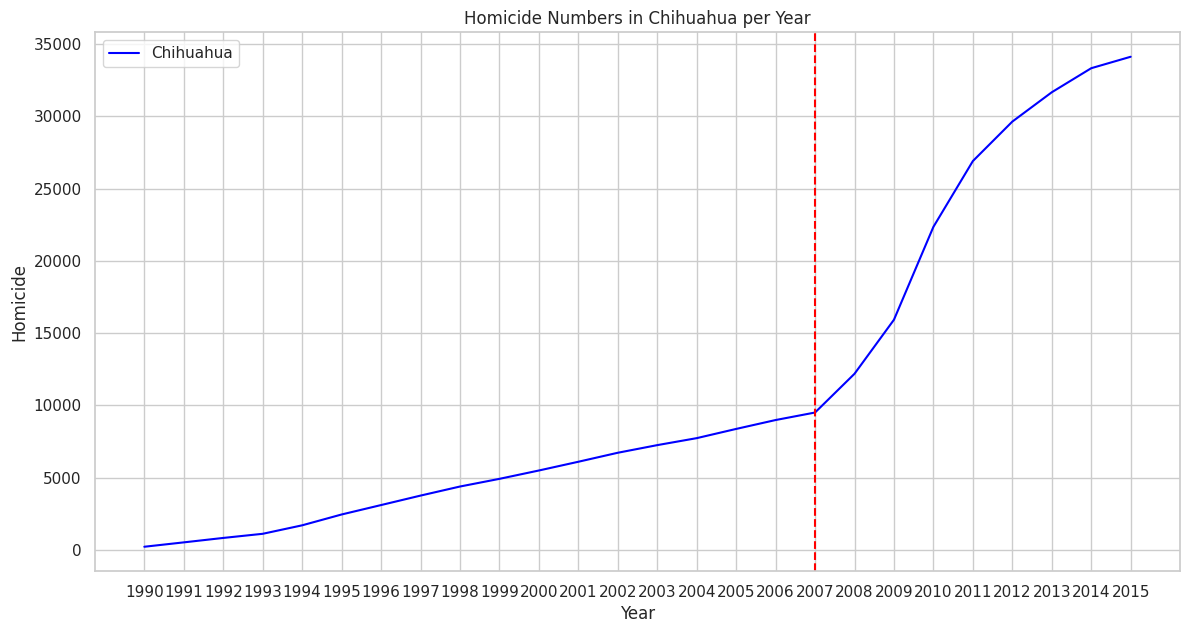

In [ ]:
# Plot of Chihuahua state

# Filter the data for the state of Chihuahua
chihuahua_data = cumulative_state_data[cumulative_state_data['State'] == 'Chihuahua']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Chihuahua
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=chihuahua_data, color='blue')  # You can change the color if desired
plt.title('Homicide Numbers in Chihuahua per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(['Chihuahua'], loc='upper left')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')


plt.show()

<ipython-input-19-28866a8a439e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counterfactual_data['Homicide'] = counterfactual_data['Year'].apply(lambda year: chihuahua_data[chihuahua_data['Year'] == '2007']['Homicide'].values[0] + (int(year) - 2007) * (chihuahua_data[chihuahua_data['Year'] == '2007']['Homicide'].values[0] - chihuahua_data[chihuahua_data['Year'] == '1990']['Homicide'].values[0]) / 17)


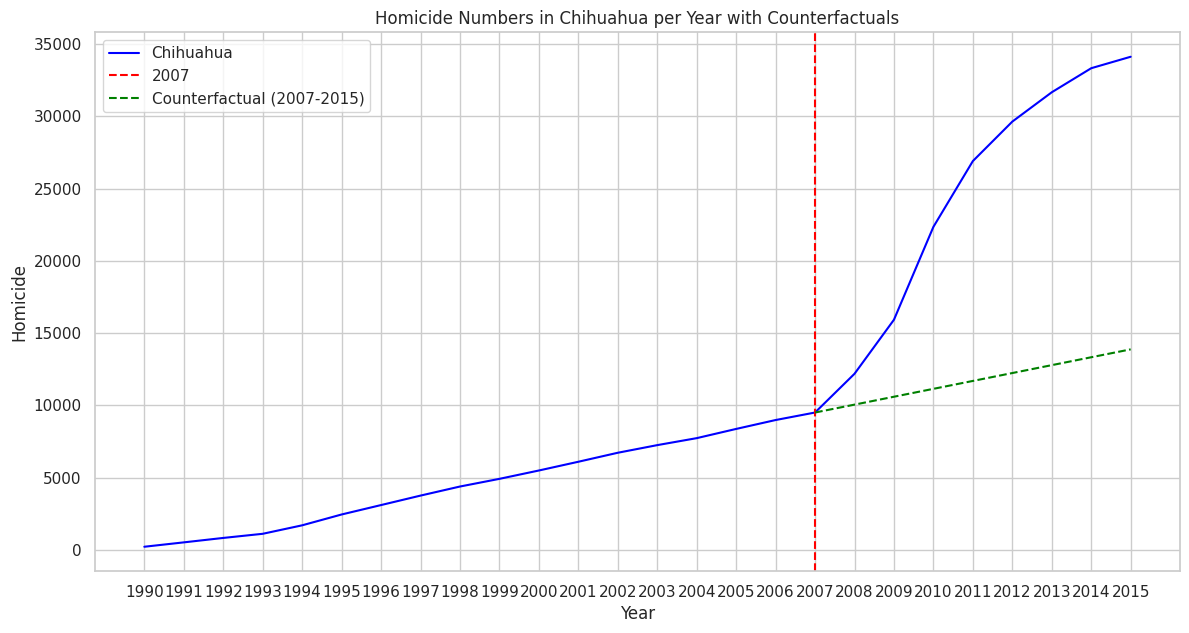

In [ ]:
# Plot showing counterfactuals

# Filter the data for the state of Chihuahua
chihuahua_data = cumulative_state_data[cumulative_state_data['State'] == 'Chihuahua']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Chihuahua
#plt.figure(figsize=(20, 12))

# Create the actual line plot for Chihuahua
sns.lineplot(x='Year', y='Homicide', data=chihuahua_data, color='blue', label='Chihuahua')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--', label='2007')

# Create the counterfactual line from 2007 to 2015 based on the trend from 1990 to 2007
counterfactual_data = chihuahua_data[chihuahua_data['Year'] >= '2007']
counterfactual_data['Homicide'] = counterfactual_data['Year'].apply(lambda year: chihuahua_data[chihuahua_data['Year'] == '2007']['Homicide'].values[0] + (int(year) - 2007) * (chihuahua_data[chihuahua_data['Year'] == '2007']['Homicide'].values[0] - chihuahua_data[chihuahua_data['Year'] == '1990']['Homicide'].values[0]) / 17)
sns.lineplot(x='Year', y='Homicide', data=counterfactual_data, color='green', linestyle='--', label='Counterfactual (2007-2015)')

plt.title('Homicide Numbers in Chihuahua per Year with Counterfactuals')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(loc='upper left')

plt.show()

In [ ]:
chihuahua_data

State  Year  Homicide
135  Chihuahua  1990     210.0
136  Chihuahua  1991     513.0
137  Chihuahua  1992     820.0
138  Chihuahua  1993    1106.0
139  Chihuahua  1994    1693.0
140  Chihuahua  1995    2443.0
141  Chihuahua  1996    3095.0
142  Chihuahua  1997    3750.0
143  Chihuahua  1998    4378.0
144  Chihuahua  1999    4909.0
145  Chihuahua  2000    5487.0
146  Chihuahua  2001    6092.0
147  Chihuahua  2002    6715.0
148  Chihuahua  2003    7243.0
149  Chihuahua  2004    7726.0
150  Chihuahua  2005    8364.0
151  Chihuahua  2006    8980.0
152  Chihuahua  2007    9500.0
153  Chihuahua  2008   12181.0
154  Chihuahua  2009   15922.0
155  Chihuahua  2010   22350.0
156  Chihuahua  2011   26903.0
157  Chihuahua  2012   29635.0
158  Chihuahua  2013   31665.0
159  Chihuahua  2014   33330.0
160  Chihuahua  2015   34123.0

#### Let's take a look at the state of Sinaloa
##### It seems 2007 was a notable year as well

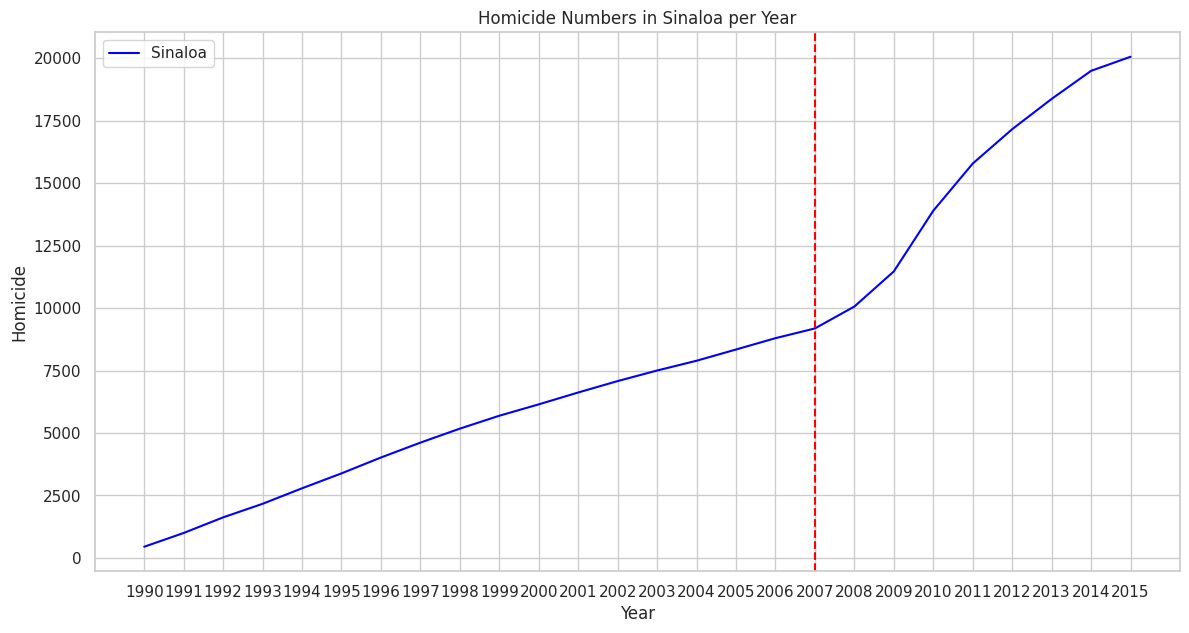

In [ ]:
# Plot of Sinaloa state

# Filter the data for the state of Sinaloa
sinaloa_data = cumulative_state_data[cumulative_state_data['State'] == 'Sinaloa']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Sinaloa
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=sinaloa_data, color='blue')  # You can change the color if desired
plt.title('Homicide Numbers in Sinaloa per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(['Sinaloa'], loc='upper left')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')


plt.show()


<ipython-input-22-d2f88e8417c2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counterfactual_data['Homicide'] = counterfactual_data['Year'].apply(lambda year: sinaloa_data[sinaloa_data['Year'] == '2007']['Homicide'].values[0] + (int(year) - 2007) * (sinaloa_data[sinaloa_data['Year'] == '2007']['Homicide'].values[0] - sinaloa_data[sinaloa_data['Year'] == '1990']['Homicide'].values[0]) / 17)


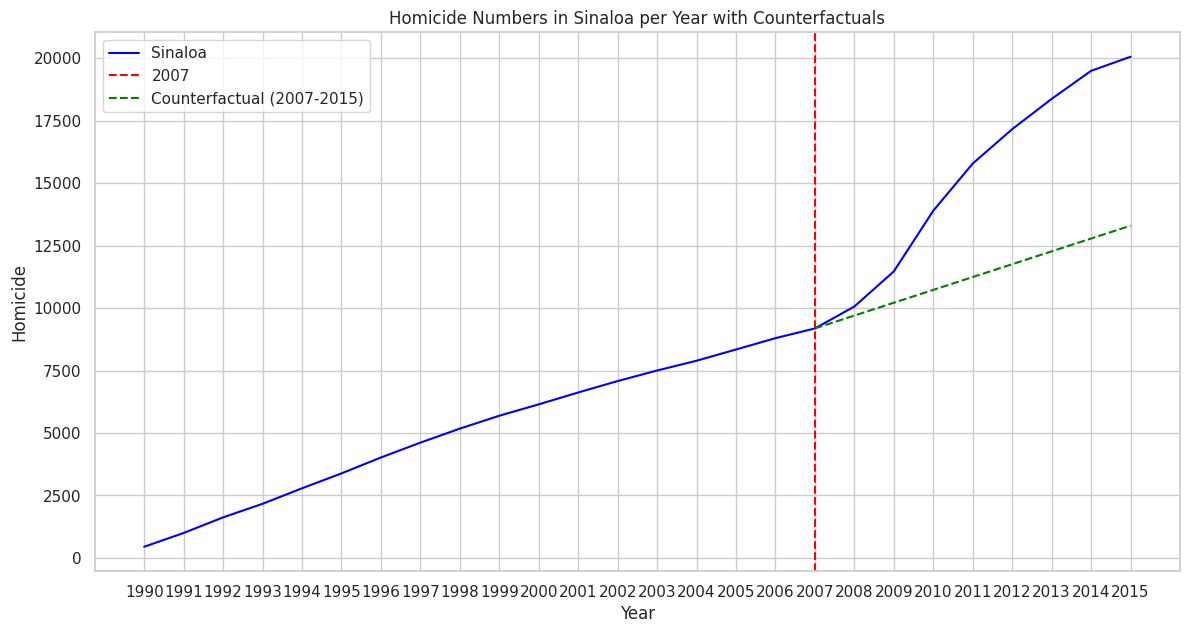

In [ ]:
# Plotting Counterfactuals in Sinaloa

# Filter the data for the state of Sinaloa
sinaloa_data = cumulative_state_data[cumulative_state_data['State'] == 'Sinaloa']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Sinaloa
#plt.figure(figsize=(20, 12))

# Create the actual line plot for Sinaloa
sns.lineplot(x='Year', y='Homicide', data=sinaloa_data, color='blue', label='Sinaloa')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--', label='2007')

# Create the counterfactual line from 2007 to 2015 based on the trend from 1990 to 2007
counterfactual_data = sinaloa_data[sinaloa_data['Year'] >= '2007']
counterfactual_data['Homicide'] = counterfactual_data['Year'].apply(lambda year: sinaloa_data[sinaloa_data['Year'] == '2007']['Homicide'].values[0] + (int(year) - 2007) * (sinaloa_data[sinaloa_data['Year'] == '2007']['Homicide'].values[0] - sinaloa_data[sinaloa_data['Year'] == '1990']['Homicide'].values[0]) / 17)
sns.lineplot(x='Year', y='Homicide', data=counterfactual_data, color='green', linestyle='--', label='Counterfactual (2007-2015)')

plt.title('Homicide Numbers in Sinaloa per Year with Counterfactuals')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(loc='upper left')

plt.show()


In [ ]:
sinaloa_data

State  Year  Homicide
648  Sinaloa  1990     448.0
649  Sinaloa  1991     999.0
650  Sinaloa  1992    1624.0
651  Sinaloa  1993    2167.0
652  Sinaloa  1994    2788.0
653  Sinaloa  1995    3385.0
654  Sinaloa  1996    4021.0
655  Sinaloa  1997    4616.0
656  Sinaloa  1998    5177.0
657  Sinaloa  1999    5693.0
658  Sinaloa  2000    6149.0
659  Sinaloa  2001    6624.0
660  Sinaloa  2002    7081.0
661  Sinaloa  2003    7504.0
662  Sinaloa  2004    7895.0
663  Sinaloa  2005    8345.0
664  Sinaloa  2006    8799.0
665  Sinaloa  2007    9189.0
666  Sinaloa  2008   10066.0
667  Sinaloa  2009   11472.0
668  Sinaloa  2010   13901.0
669  Sinaloa  2011   15790.0
670  Sinaloa  2012   17166.0
671  Sinaloa  2013   18378.0
672  Sinaloa  2014   19502.0
673  Sinaloa  2015   20066.0

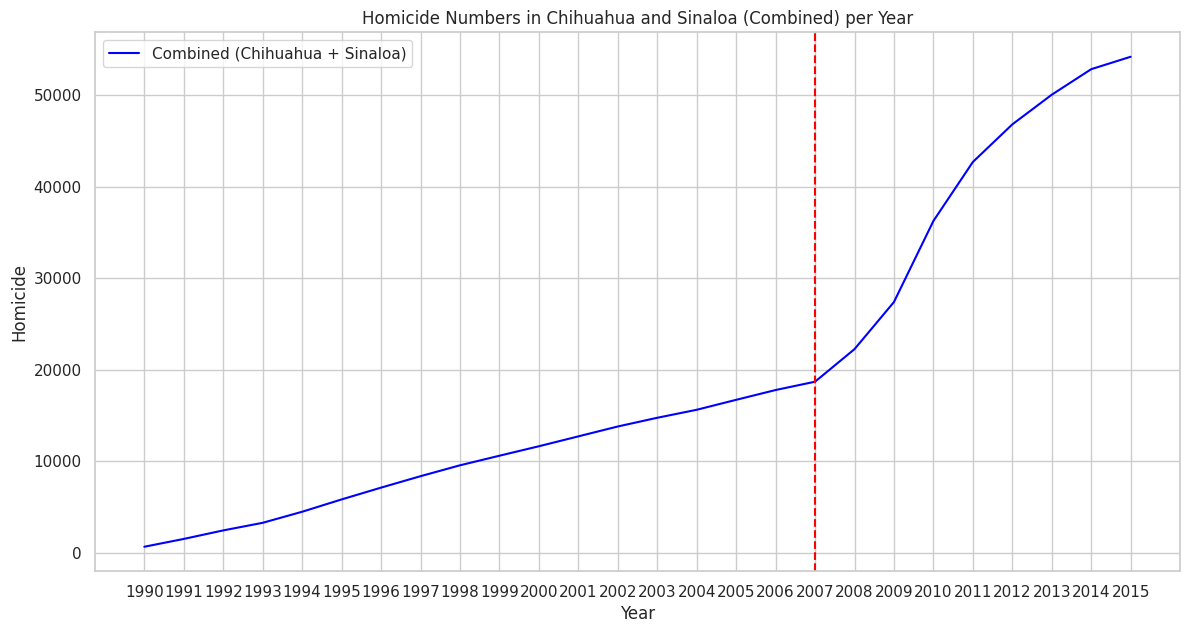

In [ ]:
# Sinaloa + Chihuahua

# Filter the data for the states of Chihuahua and Sinaloa
chihuahua_data = cumulative_state_data[cumulative_state_data['State'] == 'Chihuahua']
sinaloa_data = cumulative_state_data[cumulative_state_data['State'] == 'Sinaloa']

# Group and sum the data for Chihuahua and Sinaloa per year
combined_data = pd.concat([chihuahua_data, sinaloa_data])
summed_data = combined_data.groupby('Year')['Homicide'].sum().reset_index()

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for the summed homicide numbers per year
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=summed_data, color='blue', label='Combined (Chihuahua + Sinaloa)')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')

plt.title('Homicide Numbers in Chihuahua and Sinaloa (Combined) per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(loc='upper left')

plt.show()

<ipython-input-25-219b0b36a528>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counterfactual_data['Homicide'] = counterfactual_data['Year'].apply(lambda year: summed_data[summed_data['Year'] == '2007']['Homicide'].values[0] + (int(year) - 2007) * (summed_data[summed_data['Year'] == '2007']['Homicide'].values[0] - summed_data[summed_data['Year'] == '1990']['Homicide'].values[0]) / 17)


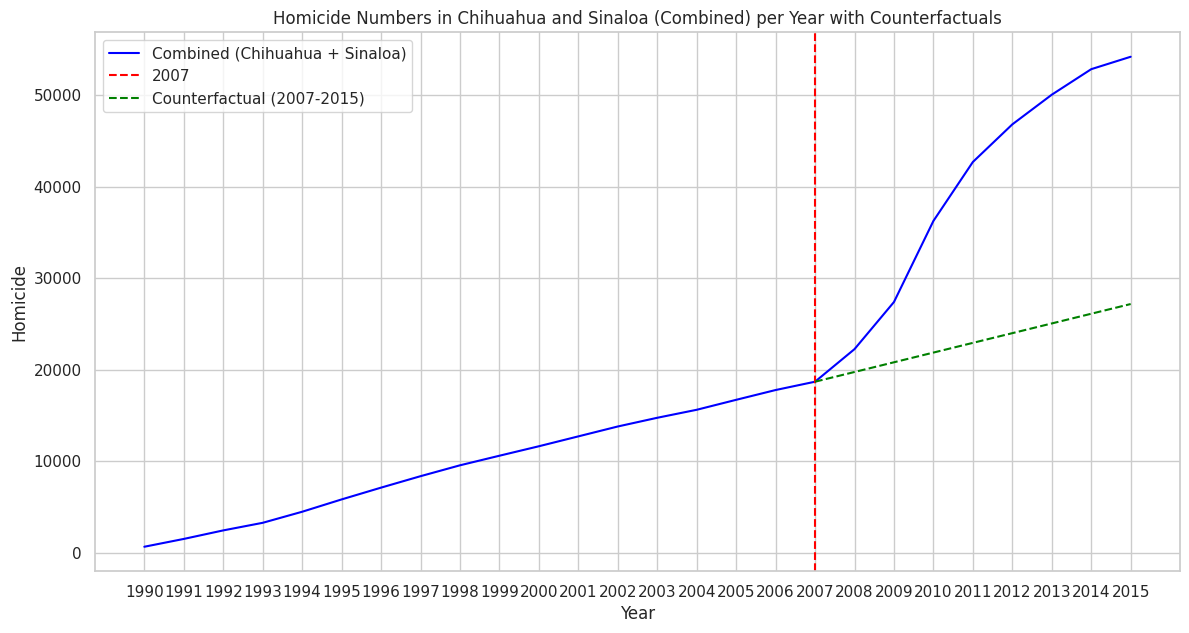

In [ ]:
# Sinaloa and Chihuahua Counterfactuals

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for the combined (Chihuahua + Sinaloa) data
#plt.figure(figsize=(20, 12))

# Create the actual line plot for the combined data
sns.lineplot(x='Year', y='Homicide', data=summed_data, color='blue', label='Combined (Chihuahua + Sinaloa)')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--', label='2007')

# Create the counterfactual line from 2007 to 2015 based on the trend from 1990 to 2007
counterfactual_data = summed_data[summed_data['Year'] >= '2007']
counterfactual_data['Homicide'] = counterfactual_data['Year'].apply(lambda year: summed_data[summed_data['Year'] == '2007']['Homicide'].values[0] + (int(year) - 2007) * (summed_data[summed_data['Year'] == '2007']['Homicide'].values[0] - summed_data[summed_data['Year'] == '1990']['Homicide'].values[0]) / 17)
sns.lineplot(x='Year', y='Homicide', data=counterfactual_data, color='green', linestyle='--', label='Counterfactual (2007-2015)')

plt.title('Homicide Numbers in Chihuahua and Sinaloa (Combined) per Year with Counterfactuals')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(loc='upper left')

plt.show()


#### Let's look at the homicide numbers in neighbouring states to Sinaloa and Chihuahua.

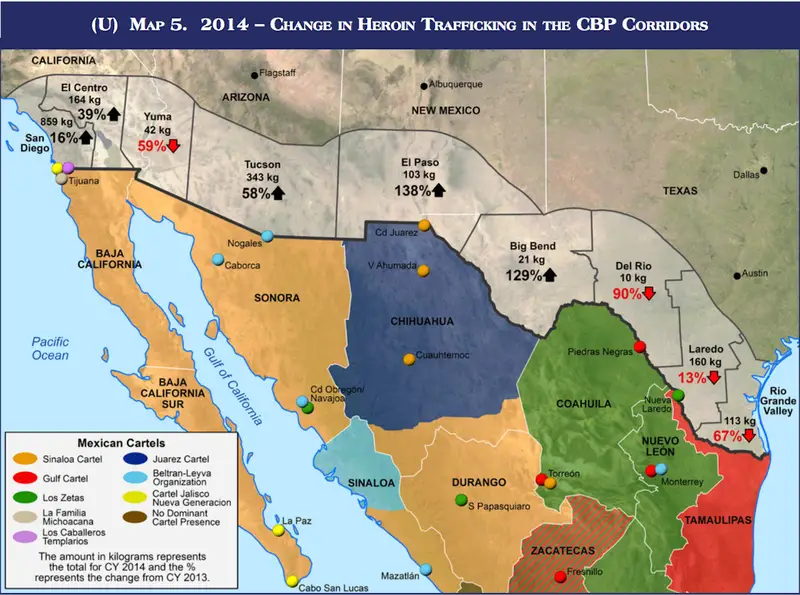

In [ ]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = r"/content/gdrive/My Drive/Colab Notebooks/mexico_cartel.png"

# Set the desired width and height (in pixels) for the displayed image
width = 1500  # Adjust as needed
height = 700  # Adjust as needed

# Display the resized image in your Jupyter Notebook
display(Image(filename=image_path, width=width, height=height))

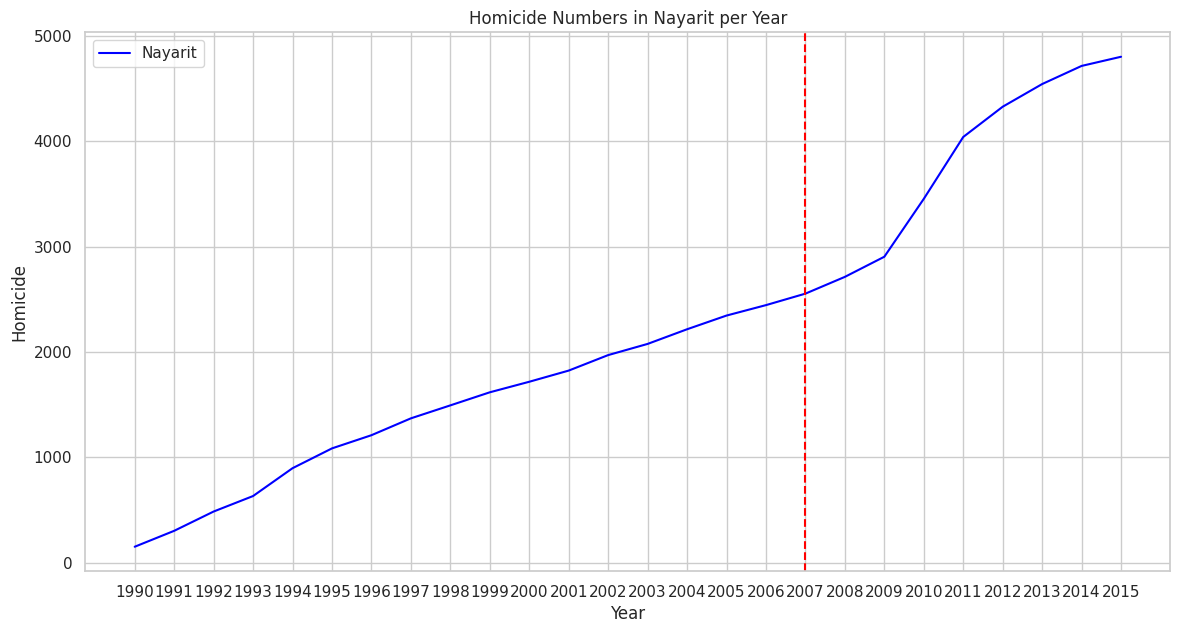

In [ ]:
# Plot of Nayarit state

# Filter the data for the state of Nayarit
Nayarit_data = cumulative_state_data[cumulative_state_data['State'] == 'Nayarit']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Nayarit
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=Nayarit_data, color='blue')  # You can change the color if desired
plt.title('Homicide Numbers in Nayarit per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(['Nayarit'], loc='upper left')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')


plt.show()

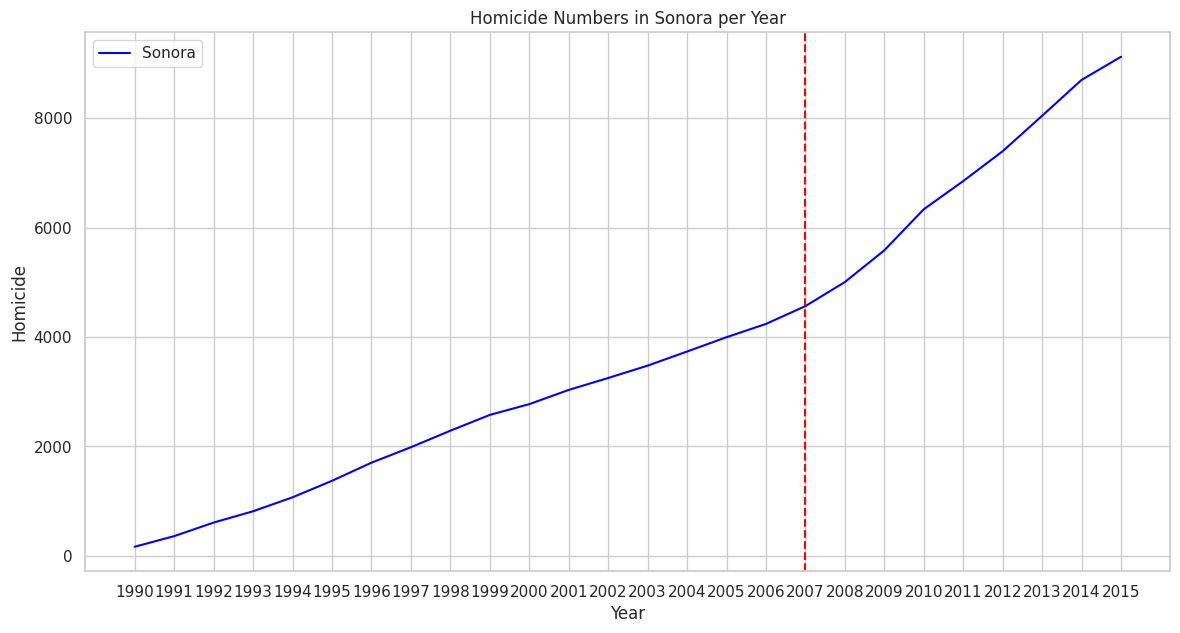

In [ ]:
# Plot of Sonora state

# Filter the data for the state of Sonora
Sonora_data = cumulative_state_data[cumulative_state_data['State'] == 'Sonora']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Sonora
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=Sonora_data, color='blue')  # You can change the color if desired
plt.title('Homicide Numbers in Sonora per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(['Sonora'], loc='upper left')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')


plt.show()


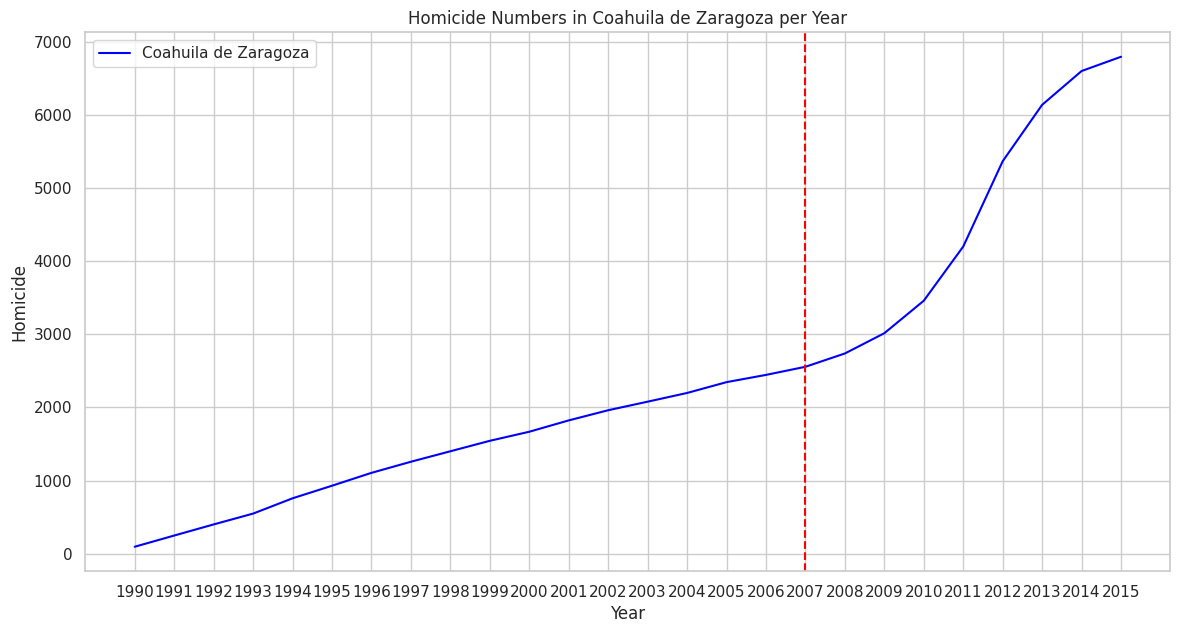

In [ ]:
# Plot of Coahuila de Zaragoza state

# Filter the data for the state of Coahuila de Zaragoza
Coahuila_data = cumulative_state_data[cumulative_state_data['State'] == 'Coahuila de Zaragoza']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Coahuila de Zaragoza
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=Coahuila_data, color='blue')  # You can change the color if desired
plt.title('Homicide Numbers in Coahuila de Zaragoza per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(['Coahuila de Zaragoza'], loc='upper left')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')


plt.show()


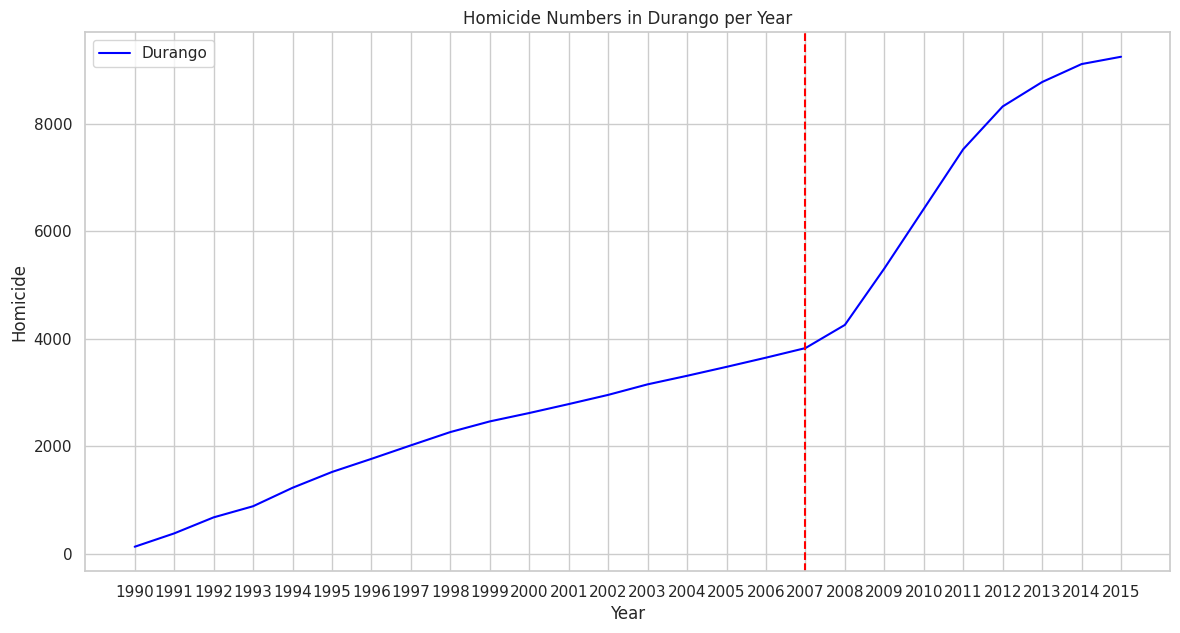

In [ ]:
# Plot of Durango state

# Filter the data for the state of Durango
Durango_data = cumulative_state_data[cumulative_state_data['State'] == 'Durango']

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a line plot for Durango
#plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Homicide', data=Durango_data, color='blue')  # You can change the color if desired
plt.title('Homicide Numbers in Durango per Year')
plt.xlabel('Year')
plt.ylabel('Homicide')
plt.legend(['Durango'], loc='upper left')

# Add a vertical red line at the year 2007
plt.axvline(x='2007', color='red', linestyle='--')


plt.show()


### Let us examine the effect of the 2007 turf war on homicide numbers in Chihuahua and Sinaloa.

#### Below is the DAG:
##### where Z = breakup of the Guadalajara cartel
#####       D = 2007 turf war between the Juarez cartel and the Sinaloa cartel
#####       Y = homicide numbers
#####       X = war on drugs
#####       U = violence unrelated to drugs like robbery

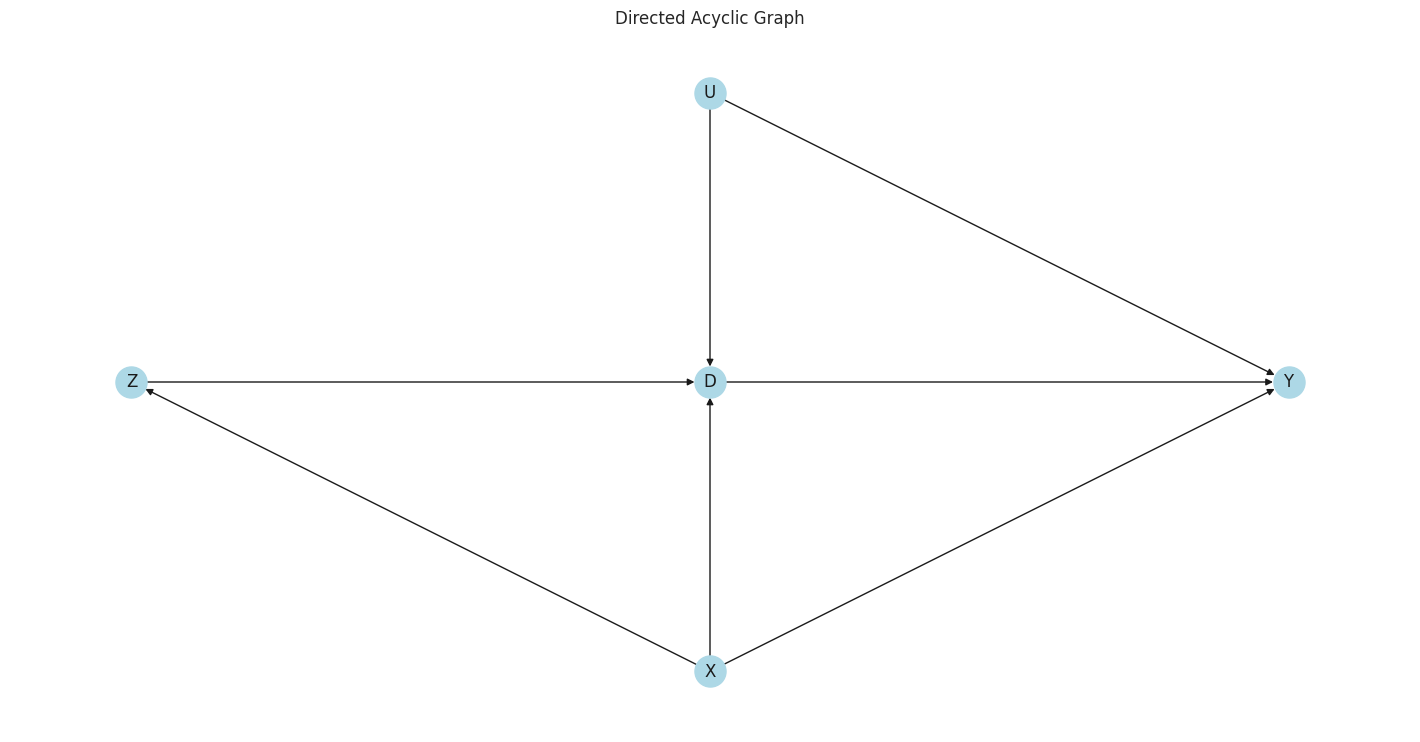

In [ ]:
# Create a directed graph (DAG)

import networkx as nx
G = nx.DiGraph()

# Specify node positions
pos = {
    "Z": (1, 1),
    "D": (2, 1),
    "Y": (3, 1),
    "U": (2, 2),
    "X": (2, 0),
}

# Add nodes and edges
G.add_nodes_from(pos.keys())
G.add_edges_from([("Z", "D"), ("D", "Y"), ("U", "D"), ("U", "Y"), ("X", "D"), ("X", "Z"), ("X", "Y")])

# Plot the DAG
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", arrows=True)
plt.title("Directed Acyclic Graph")
plt.show()


### It seems this research will focus on the combined homicide numbers in Chihuahua and Sinaloa, taking into account the 2007 turf war treatment. However, we have 2 problems:

##### 1. The problem of counterfactuals as we are using observational data. So, we may need a controlled state like Sinaloa and Chihuahua without any cartel turf war. This may be hard to get in Mexico.
##### 2. The problem of ignorable treatment assignment. The cartels self-selected Sinaloa and Chihuahua; which means there's no randomization.

##### For starters, let us use simple difference-in-difference with Sinaloa and Chihuahua as the treated units (since the turf war is over the control of Chihuahua) and the neighboring states of Sonora, Durango, Coahuila, and Nayarit as controlled units

In [ ]:
# DID for Sinaloa and Chihuahua and Neighboring States
import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Sinaloa', 'Chihuahua']
control_states = ['Sonora', 'Durango', 'Nayarit', 'Coahuila de Zaragoza']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     15.22
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000103
Time:                        15:51:34   Log-Likelihood:                -8648.1
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5345.76

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# DID between Chihuahua and Nayarit

import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Chihuahua']
control_states = ['Nayarit']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000346
Time:                        15:51:34   Log-Likelihood:                -8649.3
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5444.84

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# DID between Chihuahua and Sonora

import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Chihuahua']
control_states = ['Sonora']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000346
Time:                        15:51:34   Log-Likelihood:                -8649.3
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5444.84

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# DID between Chihuahua and Durango

import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Chihuahua']
control_states = ['Durango']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000346
Time:                        15:51:34   Log-Likelihood:                -8649.3
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5444.84

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# DID between Chihuahua and Coahuila de Zaragoza

import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Chihuahua']
control_states = ['Coahuila de Zaragoza']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000346
Time:                        15:51:34   Log-Likelihood:                -8649.3
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5444.84

In [ ]:
# DID between Chihuahua and Zacatecas- next to Durango

import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Chihuahua']
control_states = ['Zacatecas']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000346
Time:                        15:51:34   Log-Likelihood:                -8649.3
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5444.84

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# DID between Chihuahua and Michoacán de Ocampo- somewhere far from Chihuahua

import statsmodels.api as sm

# Define your treatment and control groups
treated_states = ['Chihuahua']
control_states = ['Michoacán de Ocampo']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
cumulative_state_data['Treated'] = cumulative_state_data['State'].apply(lambda x: 1 if x in treated_states else 0)
cumulative_state_data['PostTreatment'] = cumulative_state_data['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
cumulative_state_data['Treated_PostTreatment'] = cumulative_state_data['Treated'] * cumulative_state_data['PostTreatment']

# Perform a linear regression for the DID estimator
X = cumulative_state_data[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = cumulative_state_data['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           0.000346
Time:                        15:51:34   Log-Likelihood:                -8649.3
No. Observations:                 832   AIC:                         1.730e+04
Df Residuals:                     830   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5444.84

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
ATE_coefficient = model.params['Treated_PostTreatment']

print("Average Treatment Effect (DID):", ATE_coefficient)

Average Treatment Effect (DID): 0.0


### Let us look at municipalities in Chihuahua

In [ ]:
df1

State Code  Municipality Code           State    Municipality  \
0             1.0                1.0  Aguascalientes  Aguascalientes   
1             1.0                1.0  Aguascalientes  Aguascalientes   
2             1.0                1.0  Aguascalientes  Aguascalientes   
3             1.0                1.0  Aguascalientes  Aguascalientes   
4             1.0                1.0  Aguascalientes  Aguascalientes   
...           ...                ...             ...             ...   
67838         NaN                NaN             NaN             NaN   
67839         NaN                NaN             NaN             NaN   
67840         NaN                NaN             NaN             NaN   
67841         NaN                NaN             NaN             NaN   
67842         NaN                NaN             NaN             NaN   

                           Year  Homicide  
0                          1990      26.0  
1                          1991      36.0  
2                          1992      26.0  
3                          1993      24.0  
4                          1994      17.0  
...                         ...       ...  
67838  Municipality (no accent)       5.0  
67839  Municipality (no accent)       4.0  
67840  Municipality (no accent)       3.0  
67841  Municipality (no accent)       2.0  
67842  Municipality (no accent)       1.0  

[64106 rows x 6 columns]

In [ ]:
df1=df1.dropna()
df1 = df1[df1['Year'] != 'INEGI CODE']
df1 = df1.drop(['State Code', 'Municipality Code'], axis=1)
df1

State    Municipality  Year  Homicide
0      Aguascalientes  Aguascalientes  1990      26.0
1      Aguascalientes  Aguascalientes  1991      36.0
2      Aguascalientes  Aguascalientes  1992      26.0
3      Aguascalientes  Aguascalientes  1993      24.0
4      Aguascalientes  Aguascalientes  1994      17.0
...               ...             ...   ...       ...
67417       Zacatecas       Zacatecas  2011      22.0
67418       Zacatecas       Zacatecas  2012      79.0
67419       Zacatecas       Zacatecas  2013      44.0
67420       Zacatecas       Zacatecas  2014      18.0
67421       Zacatecas       Zacatecas  2015      14.0

[61458 rows x 4 columns]

In [ ]:
# Cumulative homicide number per municipality

# Sort the DataFrame by 'State', 'Municipality', and 'Year'
df1 = df1.sort_values(by=['State', 'Municipality', 'Year'])

# Calculate the cumulative homicide number per municipality per year
df1['Cumulative Homicide'] = df1.groupby(['State', 'Municipality'])['Homicide'].cumsum()

df1

State    Municipality  Year  Homicide  Cumulative Homicide
0      Aguascalientes  Aguascalientes  1990      26.0                 26.0
1      Aguascalientes  Aguascalientes  1991      36.0                 62.0
2      Aguascalientes  Aguascalientes  1992      26.0                 88.0
3      Aguascalientes  Aguascalientes  1993      24.0                112.0
4      Aguascalientes  Aguascalientes  1994      17.0                129.0
...               ...             ...   ...       ...                  ...
67417       Zacatecas       Zacatecas  2011      22.0                177.0
67418       Zacatecas       Zacatecas  2012      79.0                256.0
67419       Zacatecas       Zacatecas  2013      44.0                300.0
67420       Zacatecas       Zacatecas  2014      18.0                318.0
67421       Zacatecas       Zacatecas  2015      14.0                332.0

[61458 rows x 5 columns]

In [ ]:
# Municipalities in Chihuahua

# Assuming 'df1' is your DataFrame
chihuahua_municipalities = df1[df1['State'] == 'Chihuahua']['Municipality'].unique()

print("Municipalities in the state of Chihuahua:")
for municipality in chihuahua_municipalities:
    print(municipality)

Municipalities in the state of Chihuahua:
Ahumada
Aldama
Allende
Aquiles Serdán
Ascensión
Bachíniva
Balleza
Batopilas
Bocoyna
Buenaventura
Camargo
Carichí
Casas Grandes
Chihuahua
Chínipas
Coronado
Coyame del Sotol
Cuauhtémoc
Cusihuiriachi
Delicias
Dr. Belisario Domínguez
El Tule
Galeana
Gran Morelos
Guachochi
Guadalupe
Guadalupe y Calvo
Guazapares
Guerrero
Gómez Farías
Hidalgo del Parral
Huejotitán
Ignacio Zaragoza
Janos
Jiménez
Julimes
Juárez
La Cruz
López
Madera
Maguarichi
Manuel Benavides
Matachí
Matamoros
Meoqui
Morelos
Moris
Namiquipa
No especificado
Nonoava
Nuevo Casas Grandes
Ocampo
Ojinaga
Praxedis G. Guerrero
Riva Palacio
Rosales
Rosario
San Francisco de Borja
San Francisco de Conchos
San Francisco del Oro
Santa Bárbara
Santa Isabel
Satevó
Saucillo
Temósachic
Urique
Uruachi
Valle de Zaragoza


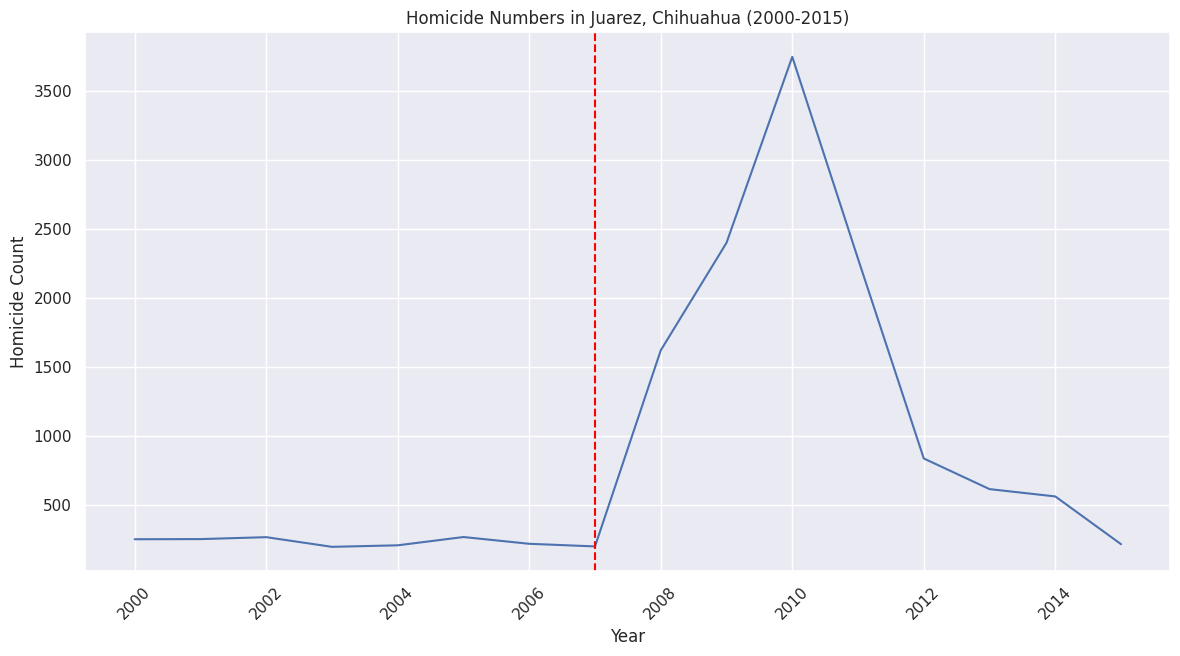

In [ ]:
# Homicide in Municipality, Juarez

df1['Year'] = df1['Year'].astype(int)  # Convert the 'Year' column to integer
juarez_homicides = df1[(df1['State'] == 'Chihuahua') & (df1['Municipality'] == 'Juárez') & (df1['Year'] >= 2000) & (df1['Year'] <= 2015)]

sns.set(style="darkgrid")
sns.lineplot(data=juarez_homicides, x='Year', y='Homicide')

# Add a red vertical line at the year 2007
plt.axvline(x=2007, color='red', linestyle='--', label='Year 2007')

plt.title('Homicide Numbers in Juarez, Chihuahua (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Homicide Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [ ]:
juarez_homicides

State Municipality  Year  Homicide  Cumulative Homicide
5330  Chihuahua       Juárez  2000     252.0               2026.0
5331  Chihuahua       Juárez  2001     253.0               2279.0
5332  Chihuahua       Juárez  2002     267.0               2546.0
5333  Chihuahua       Juárez  2003     197.0               2743.0
5334  Chihuahua       Juárez  2004     208.0               2951.0
5335  Chihuahua       Juárez  2005     268.0               3219.0
5336  Chihuahua       Juárez  2006     219.0               3438.0
5337  Chihuahua       Juárez  2007     200.0               3638.0
5338  Chihuahua       Juárez  2008    1620.0               5258.0
5339  Chihuahua       Juárez  2009    2399.0               7657.0
5340  Chihuahua       Juárez  2010    3746.0              11403.0
5341  Chihuahua       Juárez  2011    2283.0              13686.0
5342  Chihuahua       Juárez  2012     837.0              14523.0
5343  Chihuahua       Juárez  2013     615.0              15138.0
5344  Chihuahua       Juárez  2014     562.0              15700.0
5345  Chihuahua       Juárez  2015     216.0              15916.0

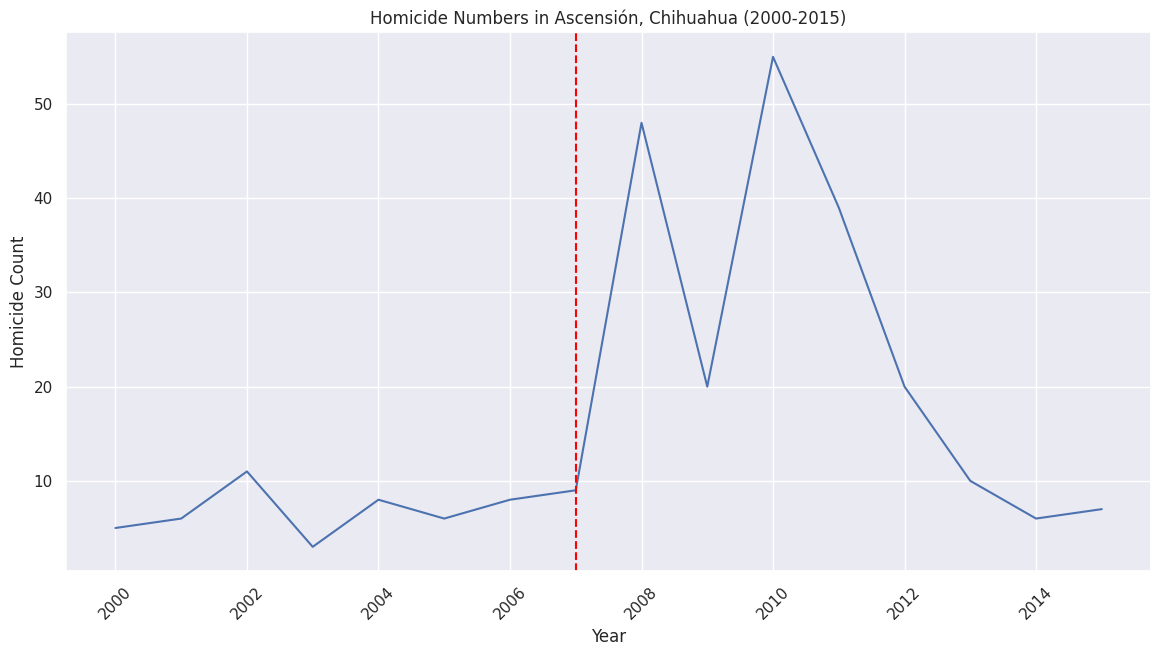

In [ ]:
# Homicide in Municipality, Ascensión

df1['Year'] = df1['Year'].astype(int)  # Convert the 'Year' column to integer
ascension_homicides = df1[(df1['State'] == 'Chihuahua') & (df1['Municipality'] == 'Ascensión') & (df1['Year'] >= 2000) & (df1['Year'] <= 2015)]

sns.set(style="darkgrid")
sns.lineplot(data=ascension_homicides, x='Year', y='Homicide')

# Add a red vertical line at the year 2007
plt.axvline(x=2007, color='red', linestyle='--', label='Year 2007')

plt.title('Homicide Numbers in Ascensión, Chihuahua (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Homicide Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

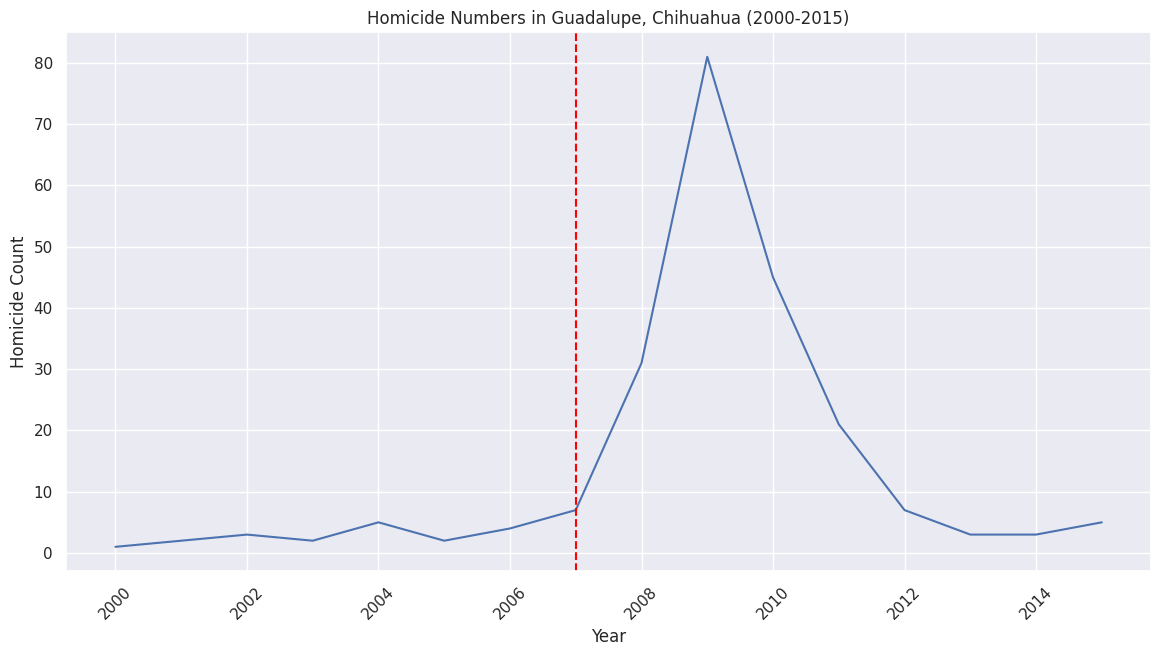

In [ ]:
# Homicide in Municipality, Guadalupe

df1['Year'] = df1['Year'].astype(int)  # Convert the 'Year' column to integer
guadalupe_homicides = df1[(df1['State'] == 'Chihuahua') & (df1['Municipality'] == 'Guadalupe') & (df1['Year'] >= 2000) & (df1['Year'] <= 2015)]

sns.set(style="darkgrid")
sns.lineplot(data=guadalupe_homicides, x='Year', y='Homicide')

# Add a red vertical line at the year 2007
plt.axvline(x=2007, color='red', linestyle='--', label='Year 2007')

plt.title('Homicide Numbers in Guadalupe, Chihuahua (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Homicide Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

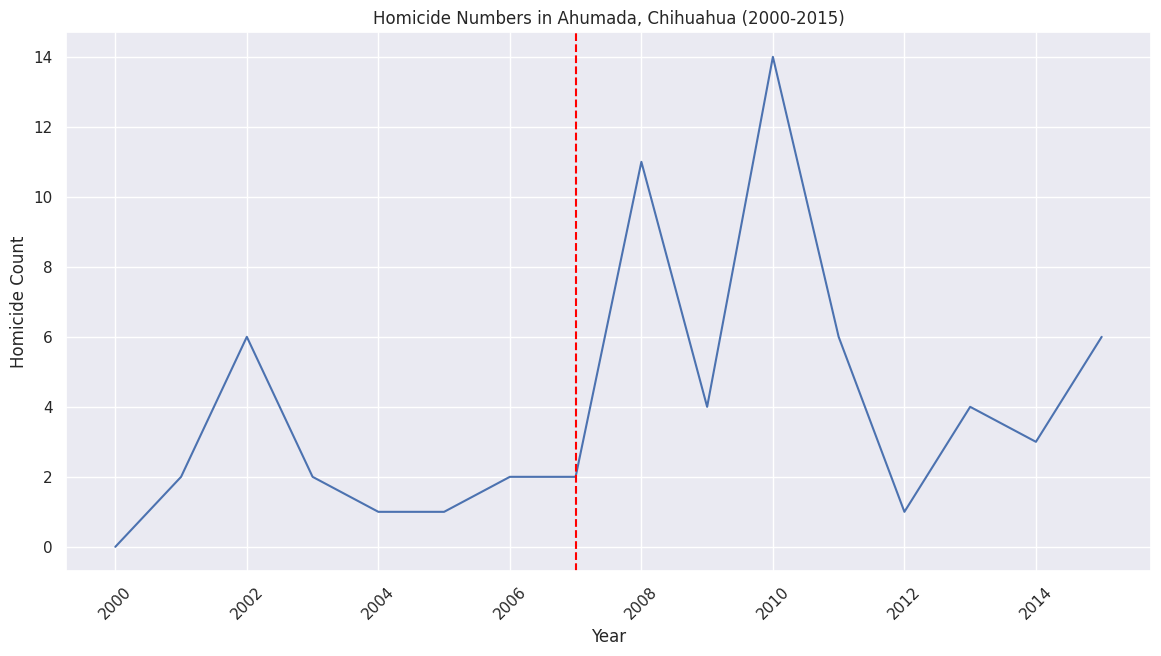

In [ ]:
# Homicide in Municipality, Ahumada

df1['Year'] = df1['Year'].astype(int)  # Convert the 'Year' column to integer
ahumada_homicides = df1[(df1['State'] == 'Chihuahua') & (df1['Municipality'] == 'Ahumada') & (df1['Year'] >= 2000) & (df1['Year'] <= 2015)]

sns.set(style="darkgrid")
sns.lineplot(data=ahumada_homicides, x='Year', y='Homicide')

# Add a red vertical line at the year 2007
plt.axvline(x=2007, color='red', linestyle='--', label='Year 2007')

plt.title('Homicide Numbers in Ahumada, Chihuahua (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Homicide Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

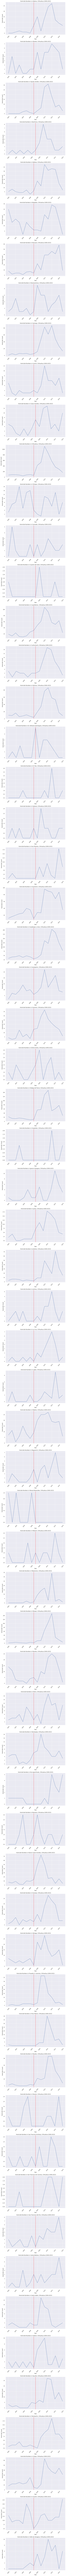

In [ ]:
# To plot using a loop over all the remaining municipalities

df1['Year'] = df1['Year'].astype(int)  # Convert the 'Year' column to integer

# List of municipalities in Chihuahua
municipalities = [
    'Aldama', 'Allende', 'Aquiles Serdán', 'Bachíniva', 'Balleza', 'Batopilas',
    'Bocoyna', 'Buenaventura', 'Camargo', 'Carichí', 'Casas Grandes', 'Chihuahua', 'Chínipas',
    'Coronado', 'Coyame del Sotol', 'Cuauhtémoc', 'Cusihuiriachi', 'Delicias', 'Dr. Belisario Domínguez',
    'El Tule', 'Galeana', 'Gran Morelos', 'Guachochi', 'Guadalupe y Calvo', 'Guazapares', 'Guerrero',
    'Gómez Farías', 'Hidalgo del Parral', 'Huejotitán', 'Ignacio Zaragoza', 'Janos', 'Jiménez', 'Julimes',
    'La Cruz', 'López', 'Madera', 'Maguarichi', 'Manuel Benavides', 'Matachí', 'Matamoros', 'Meoqui',
    'Morelos', 'Moris', 'Namiquipa', 'No especificado', 'Nonoava', 'Nuevo Casas Grandes', 'Ocampo',
    'Ojinaga', 'Praxedis G. Guerrero', 'Riva Palacio', 'Rosales', 'Rosario', 'San Francisco de Borja',
    'San Francisco de Conchos', 'San Francisco del Oro', 'Santa Bárbara', 'Santa Isabel', 'Satevó',
    'Saucillo', 'Temósachic', 'Urique', 'Uruachi', 'Valle de Zaragoza'
]

# Set the style and create a subplot grid
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=len(municipalities), figsize=(10, 6 * len(municipalities)))

# Loop through municipalities and create graphs
for i, municipality in enumerate(municipalities):
    ax = axes[i]
    municipality_homicides = df1[(df1['State'] == 'Chihuahua') & (df1['Municipality'] == municipality) & (df1['Year'] >= 2000) & (df1['Year'] <= 2015)]

    sns.lineplot(data=municipality_homicides, x='Year', y='Homicide', ax=ax)

    # Add a red vertical line at the year 2007
    ax.axvline(x=2007, color='red', linestyle='--', label='Year 2007')

    ax.set_title(f'Homicide Numbers in {municipality}, Chihuahua (2000-2015)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Homicide Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### DID Between Juarez Municipality and Some Other Municipalities
##### I ensured the control municipalities chosen have parellel trends

In [ ]:
# DID between Juarez and Guadalupe y Calvo

import statsmodels.api as sm

# Define your treatment and control groups
treated_mun = ['Juárez']
control_mun = ['Guadalupe y Calvo']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
df1['Treated'] = df1['Municipality'].apply(lambda x: 1 if x in treated_mun else 0)
df1['PostTreatment'] = df1['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
df1['Treated_PostTreatment'] = df1['Treated'] * df1['PostTreatment']

# Perform a linear regression for the DID estimator
X = df1[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = df1['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1217.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:52:10   Log-Likelihood:            -3.0169e+05
No. Observations:               61458   AIC:                         6.034e+05
Df Residuals:                   61454   BIC:                         6.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.96

In [ ]:
# DID between Juarez and Huejotitán

import statsmodels.api as sm

# Define your treatment and control groups
treated_mun = ['Juárez']
control_mun = ['Huejotitán']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
df1['Treated'] = df1['Municipality'].apply(lambda x: 1 if x in treated_mun else 0)
df1['PostTreatment'] = df1['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
df1['Treated_PostTreatment'] = df1['Treated'] * df1['PostTreatment']

# Perform a linear regression for the DID estimator
X = df1[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = df1['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1217.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:52:10   Log-Likelihood:            -3.0169e+05
No. Observations:               61458   AIC:                         6.034e+05
Df Residuals:                   61454   BIC:                         6.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.96

In [ ]:
# DID between Juarez and some municiaplities

import statsmodels.api as sm

# Define your treatment and control groups
treated_mun = ['Juárez']
control_mun = ['San Francisco de Conchos', 'Rosario', 'No especificado', 'Julimes', 'El Tule']

# Define your pre-treatment and post-treatment periods
pre_treatment_years = list(range(1990, 2007))
post_treatment_years = list(range(2007, 2016))

# Create dummy variables for treatment and post-treatment
df1['Treated'] = df1['Municipality'].apply(lambda x: 1 if x in treated_mun else 0)
df1['PostTreatment'] = df1['Year'].apply(lambda x: 1 if x in post_treatment_years else 0)

# Create interaction terms for treatment and post-treatment
df1['Treated_PostTreatment'] = df1['Treated'] * df1['PostTreatment']

# Perform a linear regression for the DID estimator
X = df1[['Treated', 'PostTreatment', 'Treated_PostTreatment']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = df1['Homicide']

model = sm.OLS(y, X).fit()

# Print regression summary to obtain the DID coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1217.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:52:11   Log-Likelihood:            -3.0169e+05
No. Observations:               61458   AIC:                         6.034e+05
Df Residuals:                   61454   BIC:                         6.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.96

### Let us look at Sinaloa Municipalities
##### Many of the Sinaloa municipalities don't have parallel trends, so can't be used for DID.

In [ ]:
# Municipalities in Sinaloa

# Assuming 'df1' is your DataFrame
sinaloa_municipalities = df1[df1['State'] == 'Sinaloa']['Municipality'].unique()

print("Municipalities in the state of Chihuahua:")
for municipality in sinaloa_municipalities:
    print(municipality)

Municipalities in the state of Chihuahua:
Ahome
Angostura
Badiraguato
Choix
Concordia
Cosalá
Culiacán
El Fuerte
Elota
Escuinapa
Guasave
Mazatlán
Mocorito
Navolato
No especificado
Rosario
Salvador Alvarado
San Ignacio
Sinaloa


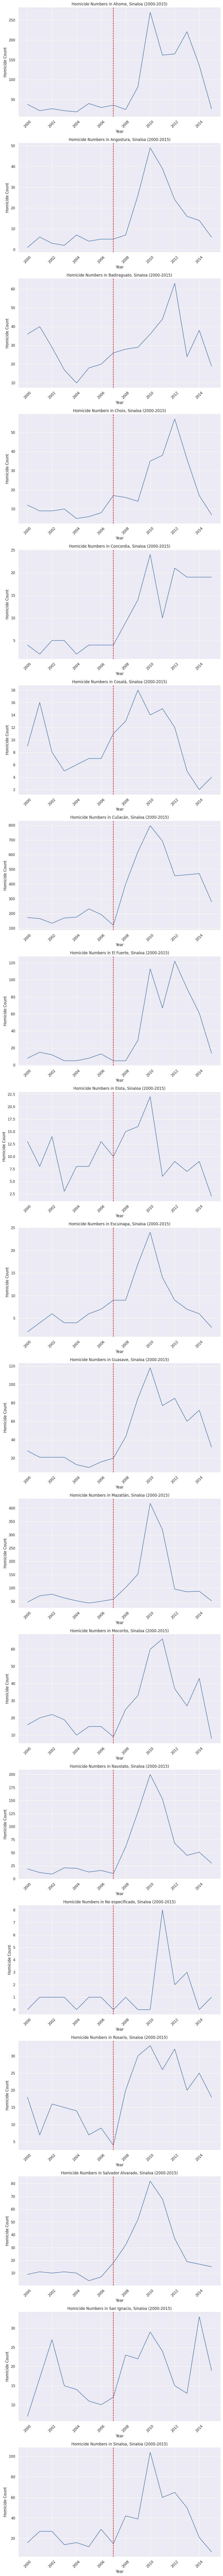

In [ ]:
# Looping through municipalities in Sinaloa
df1['Year'] = df1['Year'].astype(int)  # Convert the 'Year' column to integer

# List of municipalities in Sinaloa
municipalities_sinaloa = [
    'Ahome', 'Angostura', 'Badiraguato', 'Choix', 'Concordia', 'Cosalá', 'Culiacán',
    'El Fuerte', 'Elota', 'Escuinapa', 'Guasave', 'Mazatlán', 'Mocorito', 'Navolato',
    'No especificado', 'Rosario', 'Salvador Alvarado', 'San Ignacio', 'Sinaloa'
]

# Set the style and create a subplot grid
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=len(municipalities_sinaloa), figsize=(10, 6 * len(municipalities_sinaloa)))

# Loop through municipalities and create graphs
for i, municipality in enumerate(municipalities_sinaloa):
    ax = axes[i]
    municipality_homicides = df1[(df1['State'] == 'Sinaloa') & (df1['Municipality'] == municipality) & (df1['Year'] >= 2000) & (df1['Year'] <= 2015)]

    sns.lineplot(data=municipality_homicides, x='Year', y='Homicide', ax=ax)

    # Add a red vertical line at the year 2007
    ax.axvline(x=2007, color='red', linestyle='--', label='Year 2007')

    ax.set_title(f'Homicide Numbers in {municipality}, Sinaloa (2000-2015)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Homicide Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Now, using synthetic control, I will create a synthetic Chihuahua and examine if the cartel war in Chihuahua caused higher homicide in Chihuahua.
